# 1. 모듈 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/단위프로젝트_1조/EDA

/content/drive/MyDrive/단위프로젝트_1조/EDA


In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.4 MB/s eta 0:00:00


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 66.6 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt install fonts-nanum

!sudo apt install font-manager
!rm -rf ~/.cache/matplotlib
!pip install koreanize-matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
import matplotlib.dates as md
from matplotlib import rc
import koreanize_matplotlib
from datetime import datetime
import matplotlib.dates as md
from pyproj import Transformer
import geopandas as gpd
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,877 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

#2. 데이터 불러오기

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2022).csv')
df2 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2021).csv')
df3 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2020).csv')
df4 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2019).csv')
df5 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2018).csv')

## 2.1. 영등포구만 저장

In [ ]:
sgg = '영등포구'                     # sgg 에 구명 대입 
dfs = [df1, df2, df3, df4, df5]   # 각 데이터 프레임들 넣고
n = ['추정매출(2022).csv','추정매출(2021).csv','추정매출(2020).csv','추정매출(2019).csv','추정매출(2018).csv']  # 파일이름
f = '/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출'   # 폴더 경로

for df, filename in zip(dfs, n):   #  dfs 와 n을  df , filename 대입 
    sgg_df = df[df['시군구명'] == sgg]  # 시군구명에 구명 넣고
    new = os.path.join(f, filename.replace('.csv', f'_{sgg}.csv'))  #  파일 이름에 해당 구를 추가하고 폴더 경로와 합해서 새로운 파일 경로를 생성하고 new 대입
    sgg_df.to_csv(new, index=False) #  /content/drive/MyDrive/상권분석/(상권-OOOO)_주소추가_마포구.csv 로 저장

In [ ]:
ydf1 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2022)_영등포구.csv')
ydf2 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2021)_영등포구.csv')
ydf3 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2020)_영등포구.csv')
ydf4 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2019)_영등포구.csv')
ydf5 = pd.read_csv('/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2018)_영등포구.csv')

# 3. 데이터 확인 및 전처리

## 3.1. 외식업종만 저장

In [ ]:
# 외식업 10개 업종에 해당하는 데이터만 새로운 df에 저장
ujlist = ['커피-음료','호프-간이주점','분식전문점','치킨전문점','패스트푸드점','제과점','양식음식점','일식음식점','중식음식점','한식음식점']
# 5개년치 불러온 df명 : ydf1~ydf5 <---- 이 부분만 바꾸기!!
dataframes = {1:ydf1,2:ydf2,3:ydf3,4:ydf4,5:ydf5} 
# 반복문 실행
for i,df in dataframes.items():
  # 동적변수명 사용
  locals()['ydf_uj'+str(i)] = df[df['서비스_업종_코드_명'].isin(ujlist)].copy() # 연도별로ydf_uj1~5 생성

## 3.2. 5개년 df를 하나로 병합

In [ ]:
ydf_uj = pd.concat([ydf_uj1,ydf_uj2,ydf_uj3,ydf_uj4,ydf_uj5])
ydf_uj

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,행정동_코드,시군구명,읍면동명,lon,lat
4,2022,4,R,전통시장,2130258,영진시장A동,CS100001,한식음식점,10884202,489,...,27,72,105,266,*,11560680,영등포구,신길제6동,126.915951,37.500438
9,2022,3,R,전통시장,2130258,영진시장A동,CS100010,커피-음료,3998089,1001,...,219,425,107,61,*,11560680,영등포구,신길제6동,126.915951,37.500438
10,2022,3,R,전통시장,2130258,영진시장A동,CS100001,한식음식점,16795939,522,...,0,60,144,281,*,11560680,영등포구,신길제6동,126.915951,37.500438
15,2022,2,R,전통시장,2130258,영진시장A동,CS100010,커피-음료,4271937,1032,...,341,303,129,99,*,11560680,영등포구,신길제6동,126.915951,37.500438
16,2022,2,R,전통시장,2130258,영진시장A동,CS100001,한식음식점,12664837,470,...,21,66,107,255,*,11560680,영등포구,신길제6동,126.915951,37.500438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8369,2018,2,R,전통시장,2130259,대신시장,CS100008,분식전문점,1409143,236,...,59,47,38,4,0,11560630,영등포구,신길제1동,126.917693,37.511062
8382,2018,3,R,전통시장,2130259,대신시장,CS100001,한식음식점,33208733,2768,...,598,641,618,350,0,11560630,영등포구,신길제1동,126.917693,37.511062
8383,2018,3,R,전통시장,2130259,대신시장,CS100008,분식전문점,194364,25,...,0,0,8,0,0,11560630,영등포구,신길제1동,126.917693,37.511062
8396,2018,4,R,전통시장,2130259,대신시장,CS100001,한식음식점,34593005,2560,...,515,742,559,181,0,11560630,영등포구,신길제1동,126.917693,37.511062


## 3.2. 점포수 결측치 채우고 데이터타입 변경

In [ ]:
ydf_uj.loc[ydf_uj['점포수']=='*', '점포수']='2'

In [ ]:
ydf_uj = ydf_uj.astype({'점포수':'int'})
ydf_uj.info()

In [ ]:
ydf_uj['연도-분기'] = ydf_uj['기준_년_코드'].astype(str) + '-' + ydf_uj['기준_분기_코드'].astype(str)
ydf_uj['연도-분기'].unique()

array(['2022-4', '2022-3', '2022-2', '2022-1', '2021-1', '2021-2',
       '2021-3', '2021-4', '2020-1', '2020-2', '2020-3', '2020-4',
       '2019-1', '2019-2', '2019-3', '2019-4', '2018-1', '2018-2',
       '2018-3', '2018-4'], dtype=object)

# 4. EDA

## 4.1. 업종별 점포수 추이(분기별)

In [ ]:
ydf_uj.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [ ]:
ydf_ujjps = ydf_uj[['연도-분기','서비스_업종_코드_명','점포수']]
ydf_ujjps

,연도-분기,서비스_업종_코드_명,점포수
4,2022-4,한식음식점,2
9,2022-3,커피-음료,2
10,2022-3,한식음식점,2
15,2022-2,커피-음료,2
16,2022-2,한식음식점,2
...,...,...,...
8369,2018-2,분식전문점,0
8382,2018-3,한식음식점,0
8383,2018-3,분식전문점,0
8396,2018-4,한식음식점,0


In [ ]:
ydf_ujjps_pv = ydf_ujjps.pivot_table(values='점포수', index=['서비스_업종_코드_명','연도-분기'], aggfunc = 'sum')
ydf_ujjps_pv

점포수
서비스_업종_코드_명 연도-분기       
분식전문점       2018-1   672
            2018-2   674
            2018-3   653
            2018-4   644
            2019-1   769
...                  ...
호프-간이주점     2021-4  1011
            2022-1   543
            2022-2   543
            2022-3   525
            2022-4   530

[200 rows x 1 columns]

In [ ]:
ydf_ujjps_line = ydf_ujjps_pv.reset_index()
ydf_ujjps_line

,서비스_업종_코드_명,연도-분기,점포수
0,분식전문점,2018-1,672
1,분식전문점,2018-2,674
2,분식전문점,2018-3,653
3,분식전문점,2018-4,644
4,분식전문점,2019-1,769
...,...,...,...
195,호프-간이주점,2021-4,1011
196,호프-간이주점,2022-1,543
197,호프-간이주점,2022-2,543
198,호프-간이주점,2022-3,525


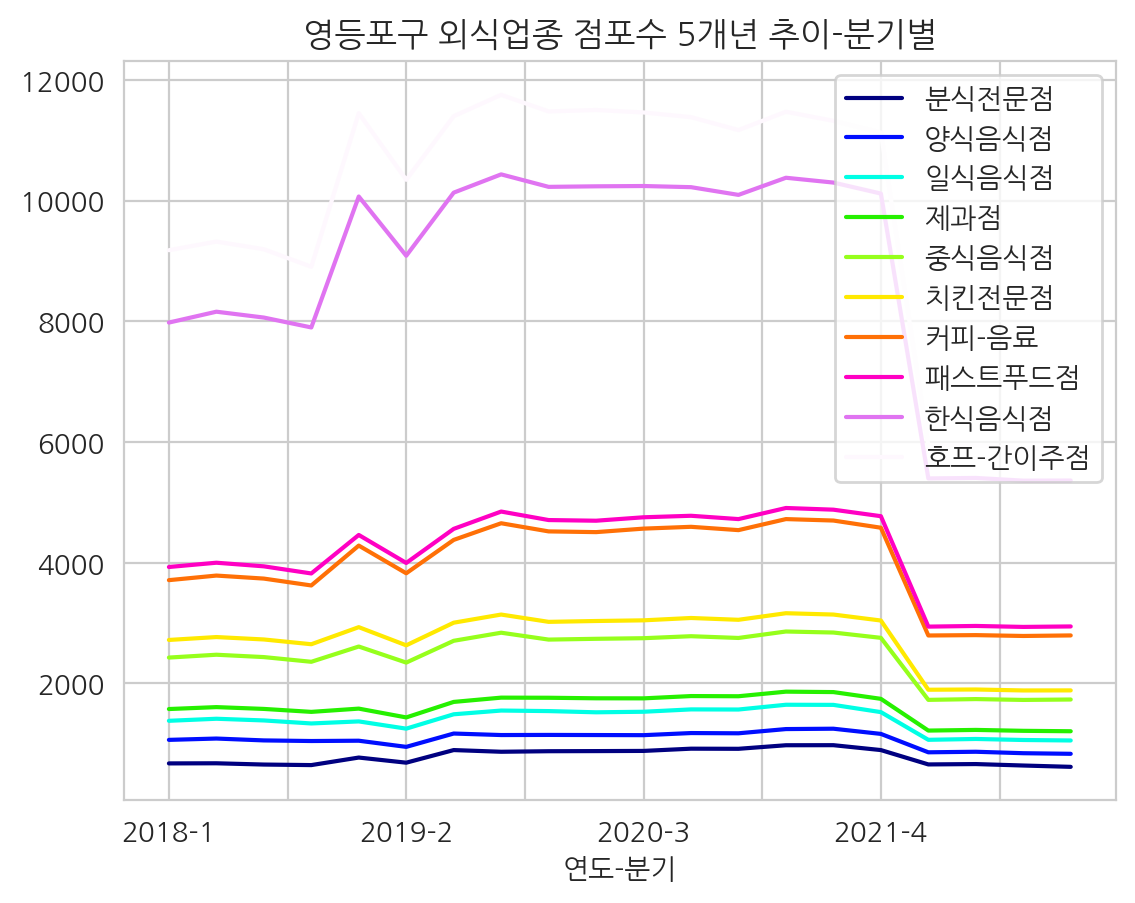

<Figure size 5000x1000 with 0 Axes>

In [ ]:
pd.pivot_table(data = ydf_ujjps_line, index = '연도-분기', columns = '서비스_업종_코드_명', values='점포수').plot(colormap ='gist_ncar', stacked=True)
plt.title('영등포구 외식업종 점포수 5개년 추이-분기별')
plt.ylabel(None)
legend = plt.legend(title='')
plt.figure(figsize=(50,10))
plt.show()

## 4.2. 업종별 점포수 추이(연도별)

In [ ]:
ydf_uj.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [ ]:
ydf_ujjps_y = ydf_uj[['기준_년_코드','서비스_업종_코드_명','점포수']]
ydf_ujjps_y

,기준_년_코드,서비스_업종_코드_명,점포수
4,2022,한식음식점,2
9,2022,커피-음료,2
10,2022,한식음식점,2
15,2022,커피-음료,2
16,2022,한식음식점,2
...,...,...,...
8369,2018,분식전문점,0
8382,2018,한식음식점,0
8383,2018,분식전문점,0
8396,2018,한식음식점,0


In [ ]:
ydf_ujjps_y_pv = ydf_ujjps_y.pivot_table(values='점포수', index=['서비스_업종_코드_명','기준_년_코드'], aggfunc = 'sum')
ydf_ujjps_y_pv

점포수
서비스_업종_코드_명 기준_년_코드       
분식전문점       2018      2643
            2019      3211
            2020      3545
            2021      3754
            2022      2568
양식음식점       2018      1599
            2019      1092
            2020      1056
            2021      1066
            2022       825
일식음식점       2018      1266
            2019      1347
            2020      1552
            2021      1553
            2022       859
제과점         2018       771
            2019       817
            2020       896
            2021       869
            2022       608
중식음식점       2018      3410
            2019      4027
            2020      3939
            2021      3961
            2022      2058
치킨전문점       2018      1168
            2019      1208
            2020      1187
            2021      1189
            2022       635
커피-음료       2018      3993
            2019      5431
            2020      6003
            2021      6142
            2022      3614
패스트푸드점      2018       833
            2019       724
            2020       748
            2021       738
            2022       598
한식음식점       2018     16411
            2019     21860
            2020     22000
            2021     21614
            2022      9751
호프-간이주점     2018      4499
            2019      5225
            2020      4894
            2021      4202
            2022      2141

In [ ]:
ydf_ujjps_y_line = ydf_ujjps_y_pv.reset_index()
ydf_ujjps_y_line

,서비스_업종_코드_명,기준_년_코드,점포수
0,분식전문점,2018,2643
1,분식전문점,2019,3211
2,분식전문점,2020,3545
3,분식전문점,2021,3754
4,분식전문점,2022,2568
5,양식음식점,2018,1599
6,양식음식점,2019,1092
7,양식음식점,2020,1056
8,양식음식점,2021,1066
9,양식음식점,2022,825


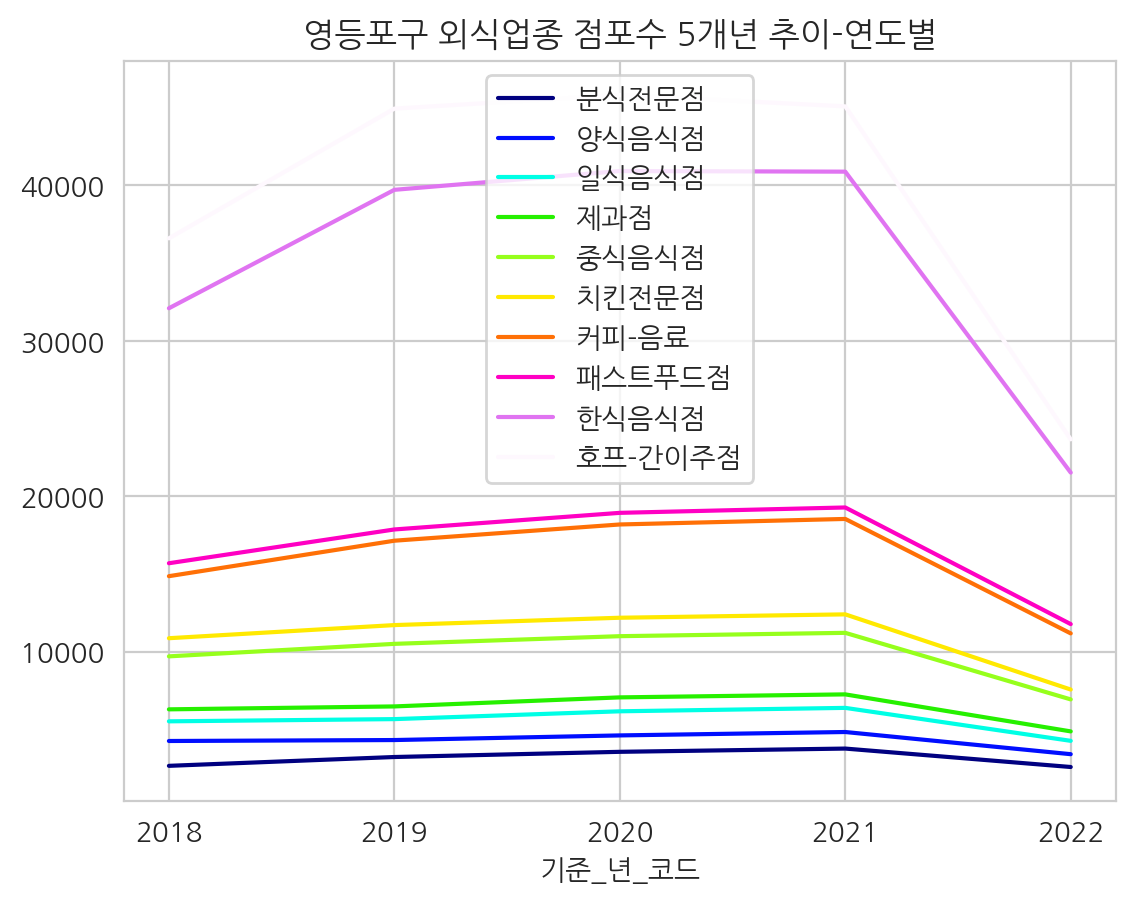

<Figure size 5000x1000 with 0 Axes>

In [ ]:
pd.pivot_table(data = ydf_ujjps_y_line, index = '기준_년_코드', columns = '서비스_업종_코드_명', values='점포수').plot(colormap ='gist_ncar', stacked=True)
plt.title('영등포구 외식업종 점포수 5개년 추이-연도별')
plt.xticks([2018,2019,2020,2021,2022])
plt.ylabel(None)
legend = plt.legend(title='')
plt.figure(figsize=(50,10))
plt.show()

## 4.3. 상권별 업종별 점포수 추이

In [ ]:
# 전체
ydf_sgjps = ydf_uj[['연도-분기','상권_구분_코드_명','서비스_업종_코드_명','점포수']]
ydf_sgjps

,연도-분기,상권_구분_코드_명,서비스_업종_코드_명,점포수
4,2022-4,전통시장,한식음식점,2
9,2022-3,전통시장,커피-음료,2
10,2022-3,전통시장,한식음식점,2
15,2022-2,전통시장,커피-음료,2
16,2022-2,전통시장,한식음식점,2
...,...,...,...,...
8369,2018-2,전통시장,분식전문점,0
8382,2018-3,전통시장,한식음식점,0
8383,2018-3,전통시장,분식전문점,0
8396,2018-4,전통시장,한식음식점,0


### 4.3.1. 골목상권

In [ ]:
ydf_sgjps_g = ydf_sgjps[ydf_sgjps['상권_구분_코드_명']=='골목상권']

In [ ]:
ydf_sgjps_g
ydf_sgjps_g_pv = ydf_sgjps_g.pivot_table(values='점포수', index=['서비스_업종_코드_명','연도-분기'], aggfunc = 'sum')
ydf_sgjps_g_pv

점포수
서비스_업종_코드_명 연도-분기      
분식전문점       2018-1  230
            2018-2  223
            2018-3  211
            2018-4  219
            2019-1  253
...                 ...
호프-간이주점     2021-4  339
            2022-1  193
            2022-2  197
            2022-3  192
            2022-4  192

[200 rows x 1 columns]

In [ ]:
ydf_sgjps_g_line = ydf_sgjps_g_pv.reset_index()
ydf_sgjps_g_line

,서비스_업종_코드_명,연도-분기,점포수
0,분식전문점,2018-1,230
1,분식전문점,2018-2,223
2,분식전문점,2018-3,211
3,분식전문점,2018-4,219
4,분식전문점,2019-1,253
...,...,...,...
195,호프-간이주점,2021-4,339
196,호프-간이주점,2022-1,193
197,호프-간이주점,2022-2,197
198,호프-간이주점,2022-3,192


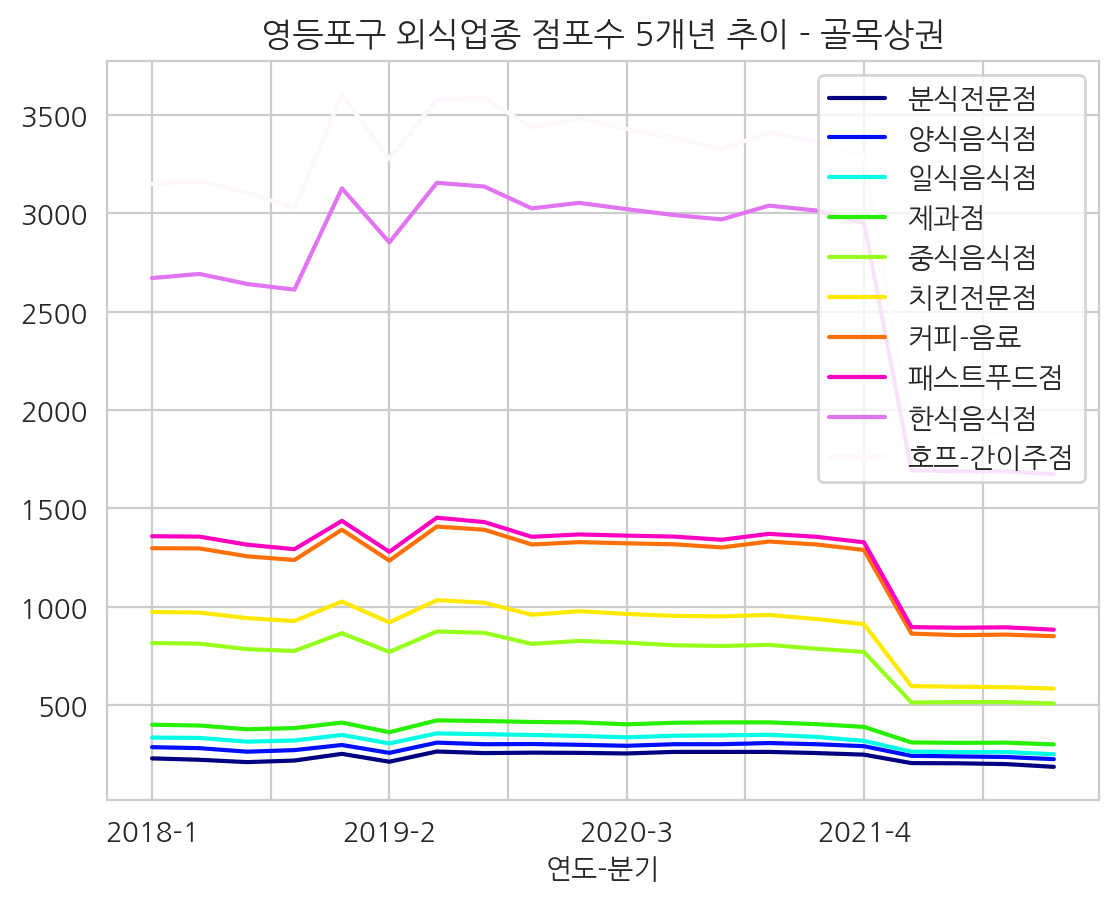

<Figure size 5000x1000 with 0 Axes>

In [ ]:
pd.pivot_table(data = ydf_sgjps_g_line, index = '연도-분기', columns = '서비스_업종_코드_명', values='점포수').plot(colormap ='gist_ncar', stacked=True)
plt.title('영등포구 외식업종 점포수 5개년 추이 - 골목상권')
plt.ylabel(None)
legend = plt.legend(title='')
plt.figure(figsize=(50,10))
plt.show()

### 4.3.2. 전통시장

In [ ]:
ydf_sgjps_j = ydf_sgjps[ydf_sgjps['상권_구분_코드_명']=='전통시장']

In [ ]:
ydf_sgjps_j
ydf_sgjps_j_pv = ydf_sgjps_j.pivot_table(values='점포수', index=['서비스_업종_코드_명','연도-분기'], aggfunc = 'sum')
ydf_sgjps_j_pv

점포수
서비스_업종_코드_명 연도-분기      
분식전문점       2018-1   39
            2018-2   39
            2018-3   36
            2018-4   31
            2019-1   24
...                 ...
호프-간이주점     2021-4   47
            2022-1   33
            2022-2   33
            2022-3   29
            2022-4   30

[200 rows x 1 columns]

In [ ]:
ydf_sgjps_j_line = ydf_sgjps_j_pv.reset_index()
ydf_sgjps_j_line

,서비스_업종_코드_명,연도-분기,점포수
0,분식전문점,2018-1,39
1,분식전문점,2018-2,39
2,분식전문점,2018-3,36
3,분식전문점,2018-4,31
4,분식전문점,2019-1,24
...,...,...,...
195,호프-간이주점,2021-4,47
196,호프-간이주점,2022-1,33
197,호프-간이주점,2022-2,33
198,호프-간이주점,2022-3,29


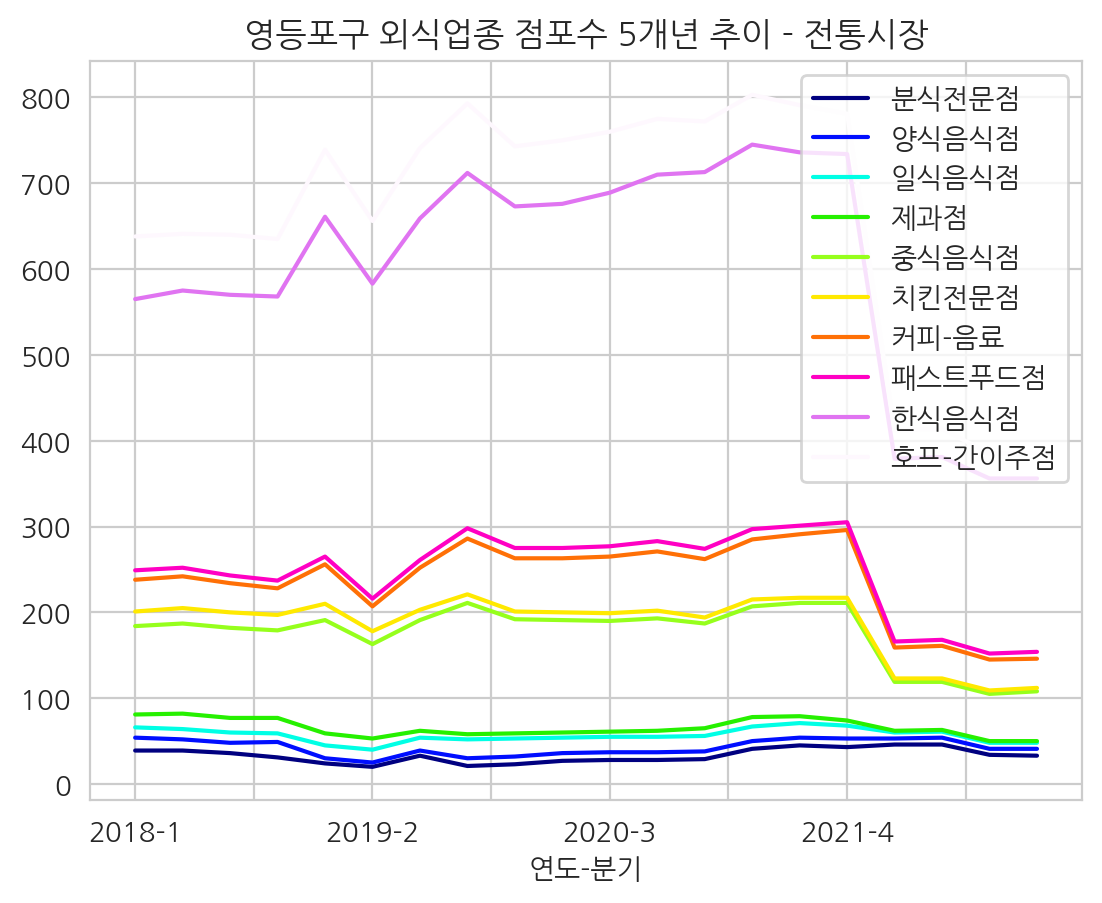

<Figure size 5000x1000 with 0 Axes>

In [ ]:
pd.pivot_table(data = ydf_sgjps_j_line, index = '연도-분기', columns = '서비스_업종_코드_명', values='점포수').plot(colormap ='gist_ncar', stacked=True)
plt.title('영등포구 외식업종 점포수 5개년 추이 - 전통시장')
plt.ylabel(None)
legend = plt.legend(title='')
plt.figure(figsize=(50,10))
plt.show()

### 4.3.3. 발달상권

In [ ]:
ydf_sgjps_b = ydf_sgjps[ydf_sgjps['상권_구분_코드_명']=='발달상권']

In [ ]:
ydf_sgjps_b
ydf_sgjps_b_pv = ydf_sgjps_b.pivot_table(values='점포수', index=['서비스_업종_코드_명','연도-분기'], aggfunc = 'sum')
ydf_sgjps_b_pv

점포수
서비스_업종_코드_명 연도-분기      
분식전문점       2018-1  403
            2018-2  412
            2018-3  406
            2018-4  394
            2019-1  492
...                 ...
호프-간이주점     2021-4  625
            2022-1  317
            2022-2  313
            2022-3  304
            2022-4  308

[200 rows x 1 columns]

In [ ]:
ydf_sgjps_b_line = ydf_sgjps_b_pv.reset_index()
ydf_sgjps_b_line

,서비스_업종_코드_명,연도-분기,점포수
0,분식전문점,2018-1,403
1,분식전문점,2018-2,412
2,분식전문점,2018-3,406
3,분식전문점,2018-4,394
4,분식전문점,2019-1,492
...,...,...,...
195,호프-간이주점,2021-4,625
196,호프-간이주점,2022-1,317
197,호프-간이주점,2022-2,313
198,호프-간이주점,2022-3,304


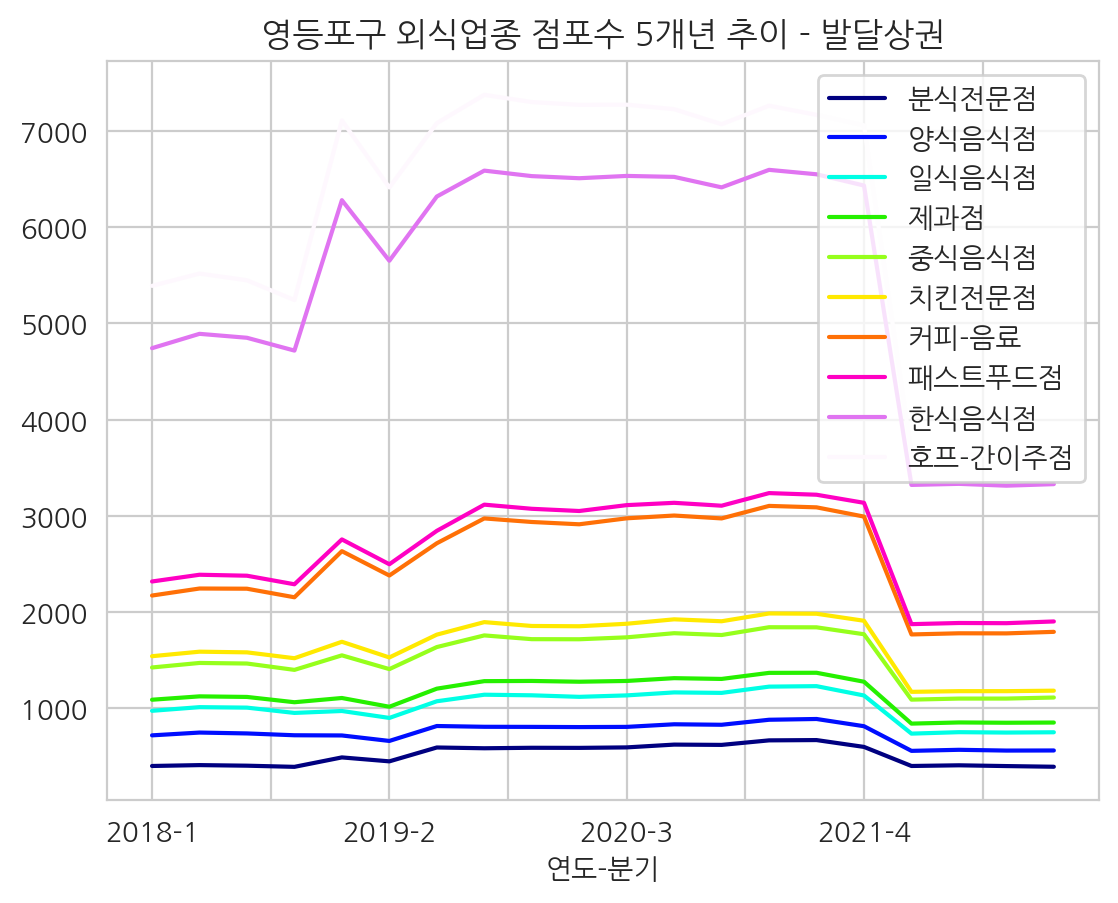

<Figure size 5000x1000 with 0 Axes>

In [ ]:
pd.pivot_table(data = ydf_sgjps_b_line, index = '연도-분기', columns = '서비스_업종_코드_명', values='점포수').plot(colormap ='gist_ncar', stacked=True)
plt.title('영등포구 외식업종 점포수 5개년 추이 - 발달상권')
plt.ylabel(None)
legend = plt.legend(title='')
plt.figure(figsize=(50,10))
plt.show()